In [1]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
from glob import glob

## glob으로 파일 불러오기

In [3]:
data_paths = glob('../dataset/mnist_png/training/0/*.png')
path = data_paths[0]

In [4]:
path

'../dataset/mnist_png/training/0\\1.png'

## tensorflow로 파일 불러오기

In [5]:
data_paths = tf.io.matching_files('../dataset/mnist_png/training/*/*.png')
data_paths

<tf.Tensor: shape=(60000,), dtype=string, numpy=
array([b'..\\dataset\\mnist_png\\training\\0\\1.png',
       b'..\\dataset\\mnist_png\\training\\0\\1000.png',
       b'..\\dataset\\mnist_png\\training\\0\\10005.png', ...,
       b'..\\dataset\\mnist_png\\training\\9\\9968.png',
       b'..\\dataset\\mnist_png\\training\\9\\9969.png',
       b'..\\dataset\\mnist_png\\training\\9\\9998.png'], dtype=object)>

In [6]:
path = data_paths[0]
path

<tf.Tensor: shape=(), dtype=string, numpy=b'..\\dataset\\mnist_png\\training\\0\\1.png'>

In [7]:
path.numpy()

b'..\\dataset\\mnist_png\\training\\0\\1.png'

## Load Image

In [8]:
gfile = tf.io.read_file(path)
image = tf.io.decode_image(gfile)

In [9]:
image.shape

TensorShape([28, 28, 1])

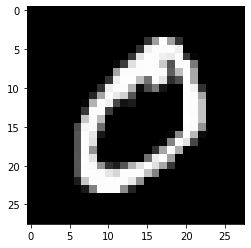

In [10]:
plt.imshow(image[:,:,0], 'gray')
plt.show()

## Set Data Generator

- train dataset에만 적용!
- test dataset에서는 사용 안함!
- 하지만, rescale은 test dataset에도 사용!

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
inputs = image[tf.newaxis, ...]
inputs.shape

TensorShape([1, 28, 28, 1])

In [13]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

In [24]:
result = next(iter(datagen.flow(inputs)))
np.min(result), np.max(result), np.mean(result)

(0.0, 253.60364, 29.574537)

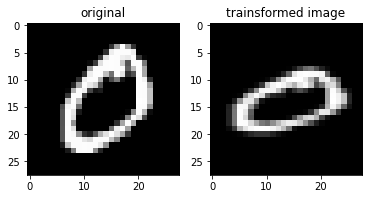

In [25]:
plt.subplot(121)
plt.title('original')
plt.imshow(np.squeeze(inputs),'gray')

plt.subplot(122)
plt.title('trainsformed image')
plt.imshow(result[0, :, :, 0], 'gray')
plt.show()

## Transformation

- width_shift_range  
- height_shift_range  
  
- brightness_range  
- zoom_range  
  
- horizontal_flip  
- vertical_flip  
  
- rescale  
  
- preprocessing_function 

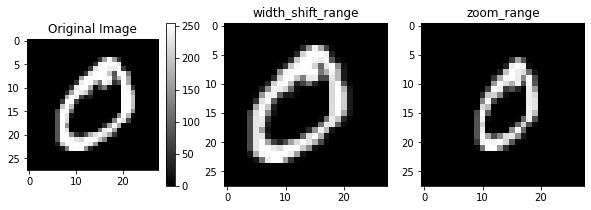

In [50]:
plt.figure(figsize=(10,3))

datagen = ImageDataGenerator(
    width_shift_range = 0.3,
)

datagen2 = ImageDataGenerator(
    zoom_range=0.7,
) 

result = next(iter(datagen.flow(inputs)))
result2 = next(iter(datagen2.flow(inputs)))

plt.subplot(131)
plt.title("Original Image")
plt.imshow(inputs[0, :, :, 0], 'gray')
plt.colorbar()

plt.subplot(132)
plt.title("width_shift_range")
plt.imshow(result[0, :, :, 0], 'gray')

plt.subplot(133)
plt.title("zoom_range")
plt.imshow(result2[0, :, :, 0], 'gray')
plt.show()

## Rescale시 주의사항
- augmentation은 train dataset에만!

In [40]:
train_datagen = ImageDataGenerator(
    zoom_range=0.7,
    rescale=1./255.
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

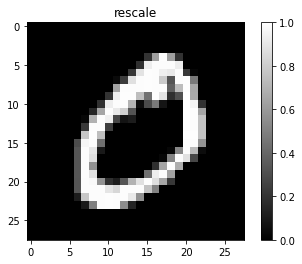

In [51]:
result2 = next(iter(test_datagen.flow(inputs)))

plt.title("rescale")
plt.imshow(result2[0, :, :, 0], 'gray')
plt.colorbar()

plt.show()